## Introduction

> The dataset I choose is the adult dataset, also called "Census Income" dataset. There are 48842 instances with 14 quantitative attributes and 1 qualitative attribute which all clearly describing its meaning. 14 quantitative attributes: 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',' occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capital-loss', 'hours-per-week', 'native-country'. Qualitative attribute: 'income'. ‘income’ has two values which is ‘<=50k’ (less or equal to 50k/yr) and ‘>50k’ (more than 50k/yr). The quantitative attributes are the features and the qualitative attribute is the target. There are 9 attributes are ‘string’ within raw data: ‘workclass’, ‘education’, ‘marital-status’, ‘occupation’, ‘relationship’, ‘race’, ‘sex’,’ native-country’ and ’income’.

In [1]:
# Loading Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data 
df = pd.read_csv('./adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- The given dataset has 48842 rows and 15 columns, in that columns 6 are numerical, 9 are categorical type data.
- by info there is no null values in the dataset but by using head function we can notice that there are some missing values but that are showing as `?`.

In [4]:
df[df.duplicated()].count()

age                52
workclass          52
fnlwgt             52
education          52
educational-num    52
marital-status     52
occupation         52
relationship       52
race               52
gender             52
capital-gain       52
capital-loss       52
hours-per-week     52
native-country     52
income             52
dtype: int64

- We can notice here `52` rows are repated. 

###  Univariate Analysis

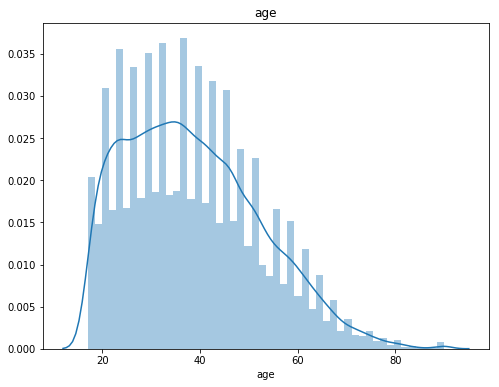

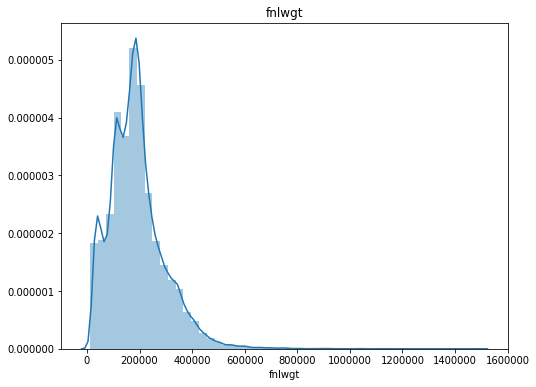

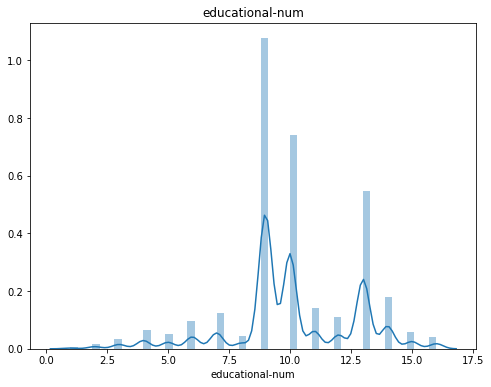

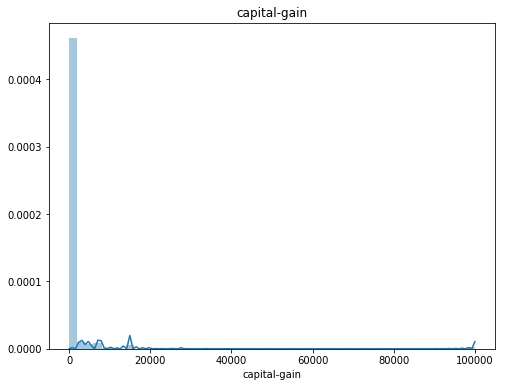

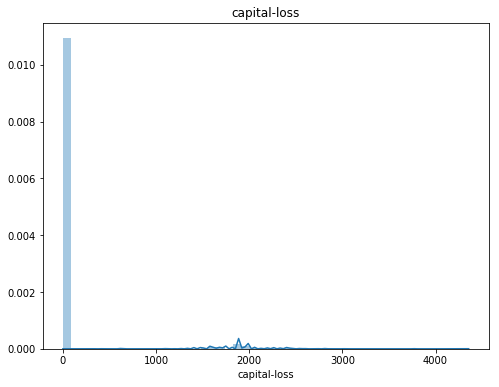

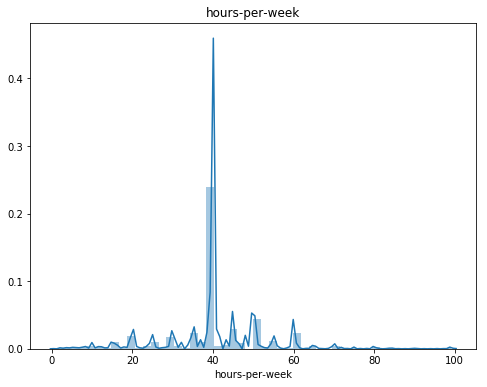

In [5]:
for i in df.select_dtypes(exclude='object'):
    plt.figure(figsize=(8,6))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

- Plot Name : dist plot
- Plot Type : Univariate
- Data Type of Variable : Numerical Variable

- Observations :
    - Age:
        - age is continues variable from the data minimum age 17 and maximum age 90.
    - fnlwgt:
        - These are continues values which are distributed around 20000.
    - Educational Number:
        - In this attribute `9`,`10`,`13` are most frequent values.
    - Capital Gain:
        - This column's most frequent value is `Zero`.
    - Capital loss:
        - In capital loss attribute `Zero` is the most frequent value.
    - Hours per week:
        - In this attribute value 40 has very high frequency.
        
    - The dataset doesn't had missing values in the numeric or continues attributes but most of attributes had many zeros.

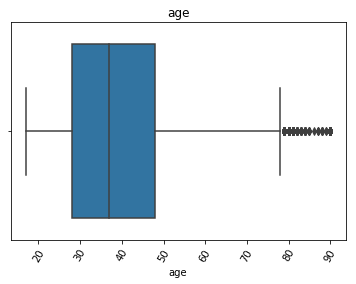

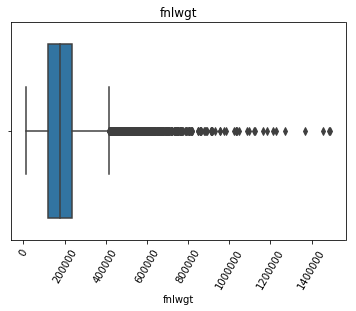

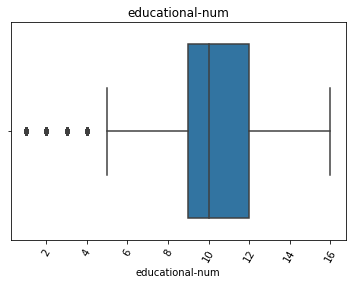

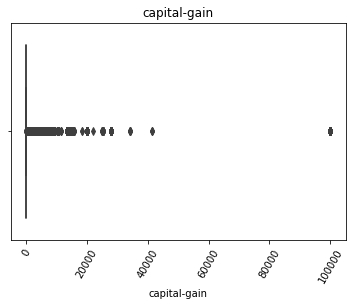

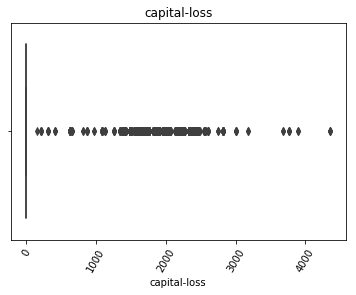

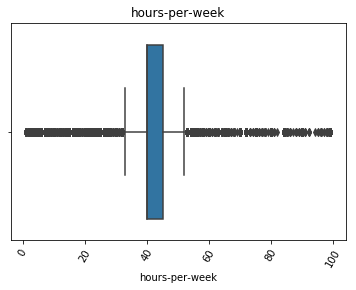

In [6]:
for i in df.select_dtypes(exclude='object'):
    sns.boxplot(df[i])
    plt.title(i)
    plt.xticks(rotation=60)
    plt.show()

- Plot Name : box plot
- Plot Type : Univariate
- Data Type of Variable : Numerical Variable

- Observations :
    - By looking box plot we know that all the coninues attributes has Extreem values nothing but outliers.

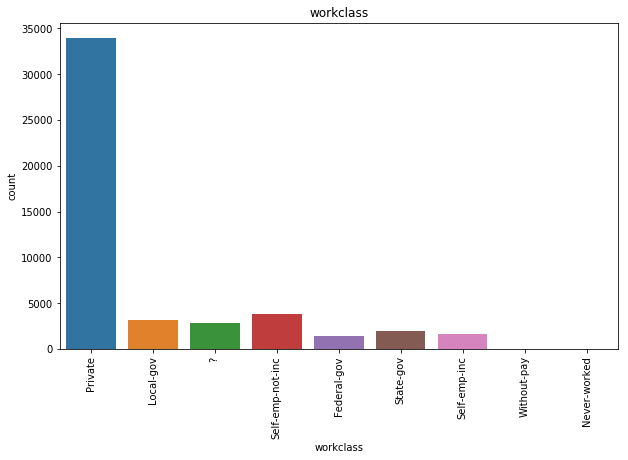

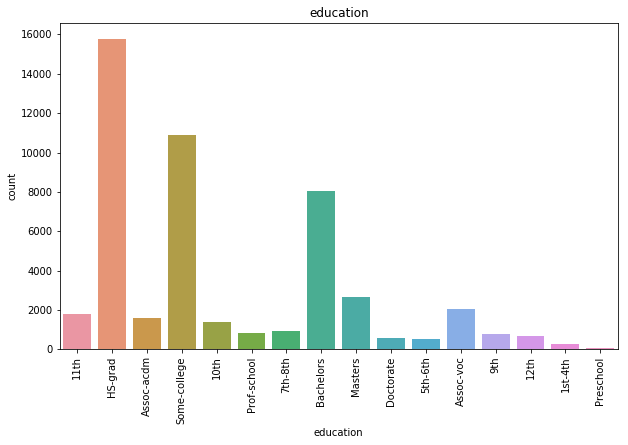

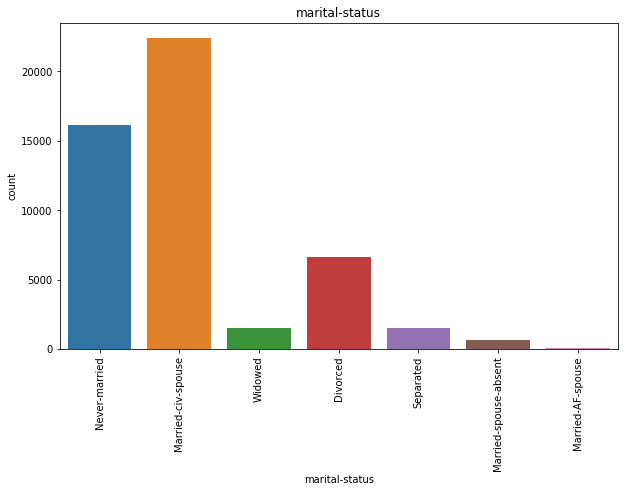

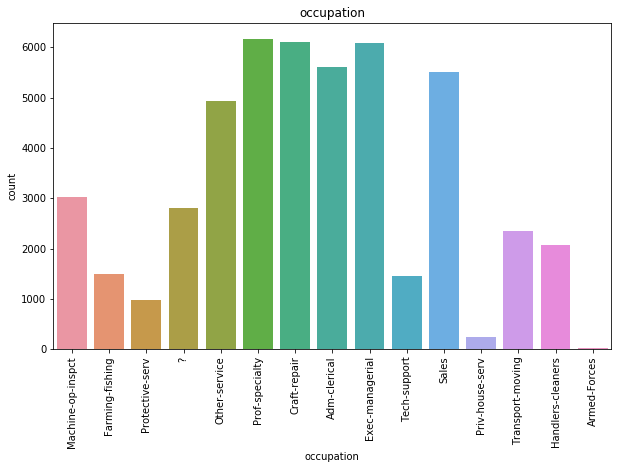

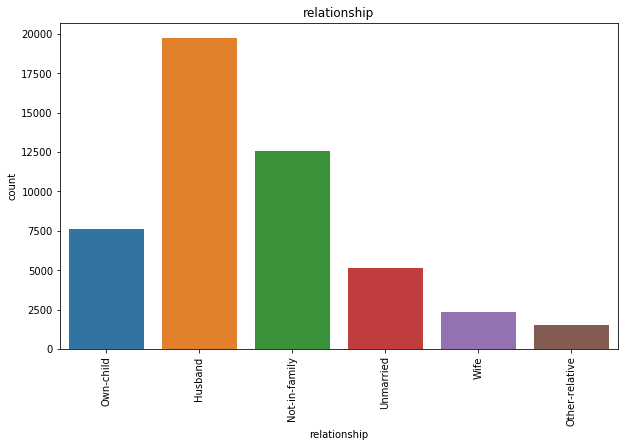

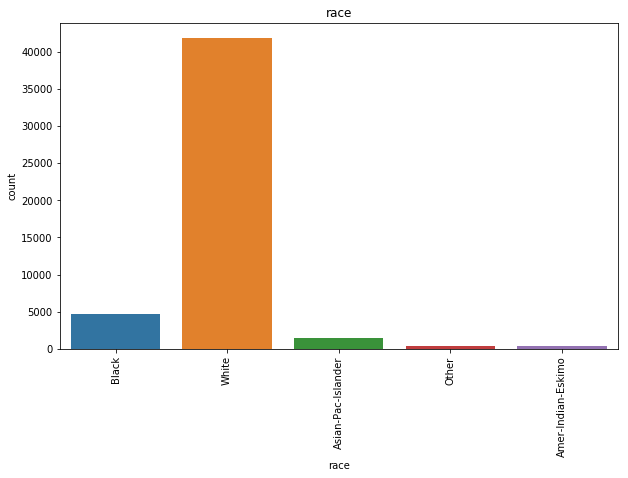

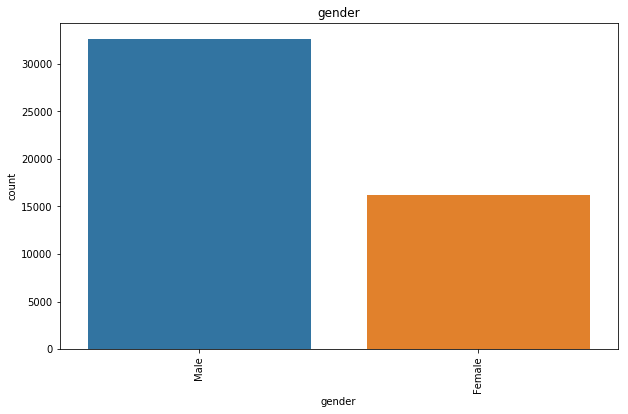

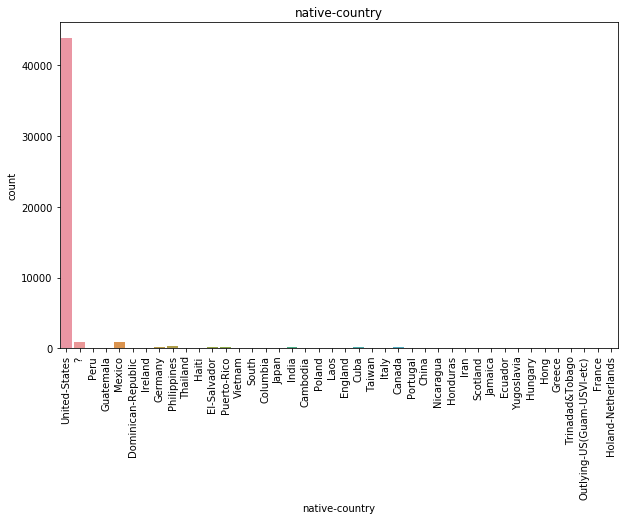

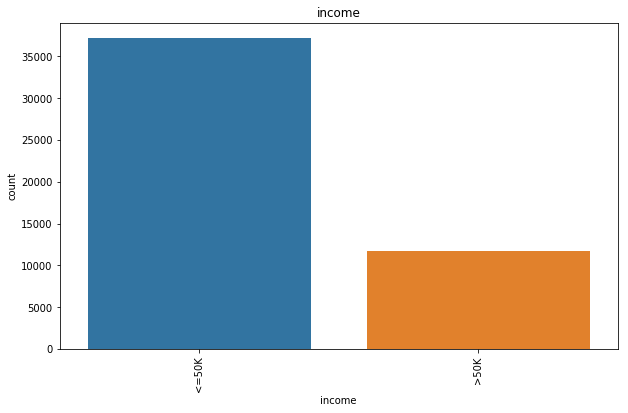

In [7]:
for i in df.select_dtypes(include='object'):
    plt.figure(figsize=(10,6))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

- Plot Name : Count plot
- Plot Type : Univariate
- Data Type of Variable : Categorical Variable

- Observations :
    - Work class:
        - Most of the members are private employees, in this column we have missing values. 
    - Education:
        - No missing values in the education column.
    - Marital Status:
        - there are no missing values.
    - Occupation:
        - In the occupation we have missing values, count around 3000.
    - Relationship:
        - In this attribute we have six categories most of the members relationship is Husband.
    - Race:
        - In this race attribute we have five categories, in that categories many are white. 
    - Gender:
        - In the given dataset many members are Male and there is no missing values.
    - Native country:
        - By looking plot we can notice that most of the members are belongs ti `United States`.
        - And some missing values are present in this data.
    - Income:
        - By looking plot most of the members belongs to lessthan or equal to 50,000 income.
        - In this attribute no missing values are present.

**Replacing '?' symbol with NaN values.**

In [8]:
df['occupation'] = df['occupation'].apply(lambda x: np.nan if x == '?' else x)
df['workclass'] = df['workclass'].apply(lambda x: np.nan if x == '?' else x)
df['native-country'] = df['native-country'].apply(lambda x: np.nan if x == '?' else x)

- In dataset we have `?` symbols so, here i'm replacing the `?` symbol with `NaN` values.

**Checking Duplicates**

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df.duplicated()].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Checking MIssing Values in percentage**

In [11]:
round((df.isnull().sum()/len(df))*100,2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

- We have null values in three columns
    - workclass          5.73 %
    - occupation         5.75 %
    - native-country     1.75 %

**replacing missing values**

In [12]:
df['workclass'].fillna(value=df['workclass'].mode()[0],inplace=True,axis=0) 
df['occupation'].fillna(value=df['occupation'].mode()[0],inplace=True,axis=0)
df['native-country'].fillna(value=df['native-country'].mode()[0],inplace=True,axis=0)

- Here i am repalcing all the null values with respective columns mode.

In [13]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- Agian here i'm checking null values

In [14]:
lower_bound =0.1
upper_bound=0.95
res = df.quantile([lower_bound,upper_bound])
res

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0.10,22.0,65742.7,7.0,0.0,0.0,24.0
0.95,63.0,379522.0,14.0,5013.0,0.0,60.0


### Winsorizing
>1.Analyze your data to make sure the outlier isn’t a result of measurement error or some other fixable error.

>2.Decide how much Winsorization you want. This is specified as a total percentage of untouched data. For example, if you want to Winsorize the top 5% and bottom 5% of data points, this is equal to 100% – 5% – 5% = 90% Winsorization. A 80% Winsorization means that 10% is modified from each tail area (see Tips on Cut-Off Point Selection below).

>3.Replace the extreme values by the maximum and/or minimum values at the threshold

In [15]:
from scipy.stats.mstats import winsorize
df["age"]           = winsorize(df["age"],(0,0.10))
df["fnlwgt"]        = winsorize(df["fnlwgt"],(0,0.10))
df["educational-num"]  = winsorize(df["educational-num"],(0,0.099))
df["capital-gain"]  = winsorize(df["capital-gain"],(0,0.099))
df["capital-loss"]  = winsorize(df["capital-loss"],(0,0.099))
df["hours-per-week"]= winsorize(df["hours-per-week"],(0.10,0.20))

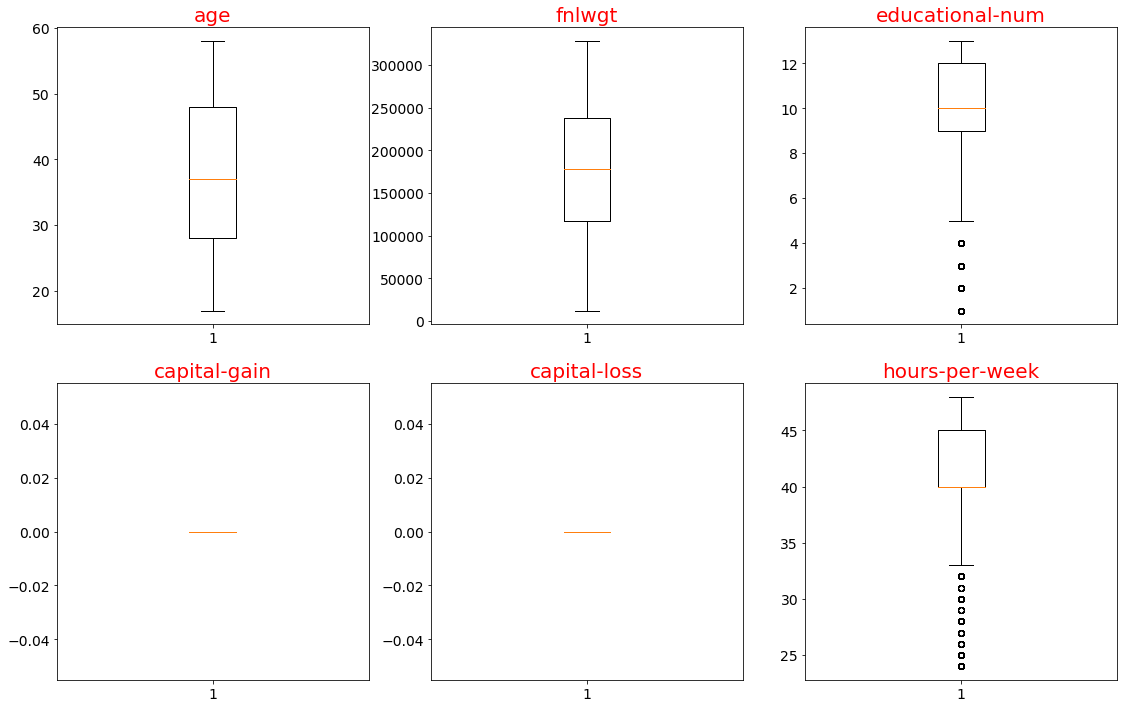

In [16]:
plt.figure(figsize=(19,12))


num_features = df.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_features[i]])
    plt.title(num_features[i],color="r",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

### Z-score
> A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score

# $$Z = \frac{x-\mu}{\sigma}$$

Z = standard score

x = observed value

𝜇  = mean of the sample

𝜎  = standard deviation of the sample

In [17]:
y = df.std()
y

age                   12.273654
fnlwgt             84927.763933
educational-num        2.371899
capital-gain           0.000000
capital-loss           0.000000
hours-per-week         7.184905
dtype: float64

> - Here we find out the standarad deviation of numerical features in our datasets

In [18]:
x=df.mean()
x

age                    37.938491
fnlwgt             181568.197274
educational-num         9.953659
capital-gain            0.000000
capital-loss            0.000000
hours-per-week         39.396024
dtype: float64

In [19]:
#adult_z=(df-x)/y
#adult_z

###  Bivariate Analysis

### Scatter plots
- It is numerical vs numerical plots
- its show the relation between two numerical columns
- example: in our dataset we compare age column with remaining numerical columns and observe the spread of data

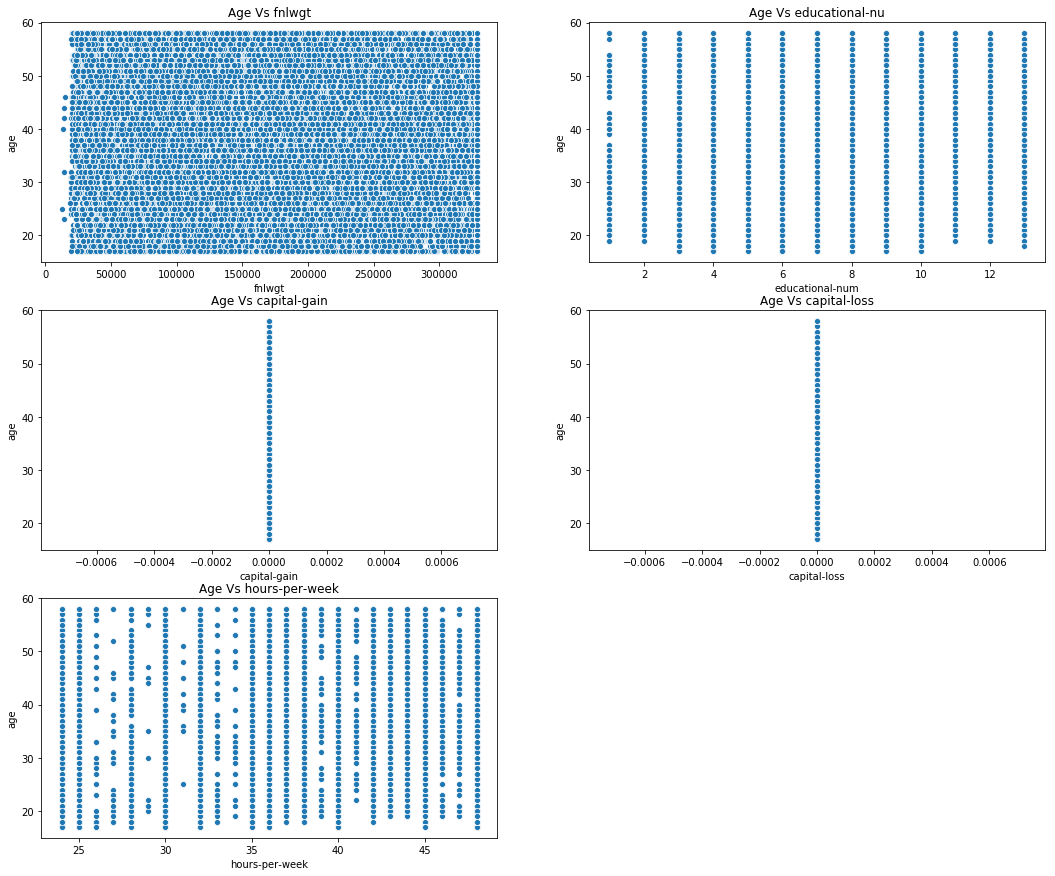

In [20]:
plt.figure(figsize=(18,15))
plt.subplot(3,2,1)
sns.scatterplot(y='age',x='fnlwgt',data=df)
plt.title('Age Vs fnlwgt')

plt.subplot(3,2,2)
sns.scatterplot(y='age',x='educational-num',data=df)
plt.title('Age Vs educational-nu')

plt.subplot(3,2,3)
sns.scatterplot(y='age',x='capital-gain',data=df)
plt.title('Age Vs capital-gain')

plt.subplot(3,2,4)
sns.scatterplot(y='age',x='capital-loss',data=df)
plt.title('Age Vs capital-loss')

plt.subplot(3,2,5)
sns.scatterplot(y='age',x='hours-per-week',data=df)
plt.title('Age Vs hours-per-week')

plt.show()

- What ever the age nothing matter's in capital gain and capital loss, after standerdise the numericall columns these two are zero.

### Hexbin plots
- Hexagonal binning plots density, rather than points. Points are binned into gridded hexagons and distribution (the number of points per hexagon) is displayed using either the color or the area of the hexagons.
- It is univariate analysis for numericalfeatures

<Figure size 720x576 with 0 Axes>

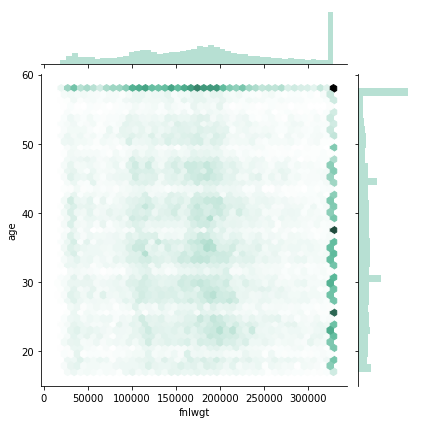

<Figure size 720x576 with 0 Axes>

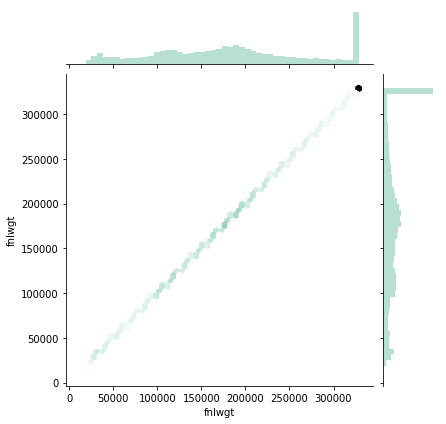

<Figure size 720x576 with 0 Axes>

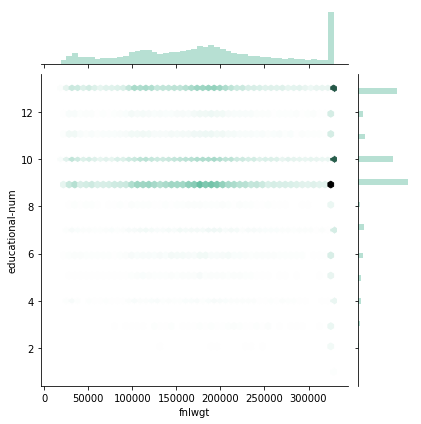

<Figure size 720x576 with 0 Axes>

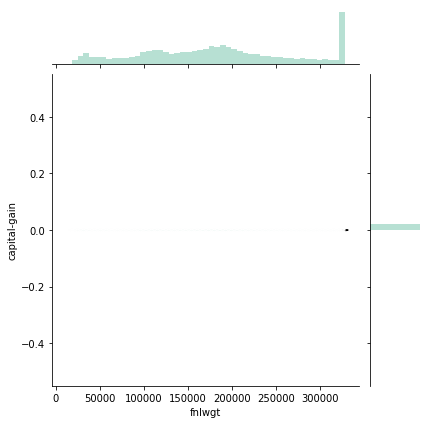

<Figure size 720x576 with 0 Axes>

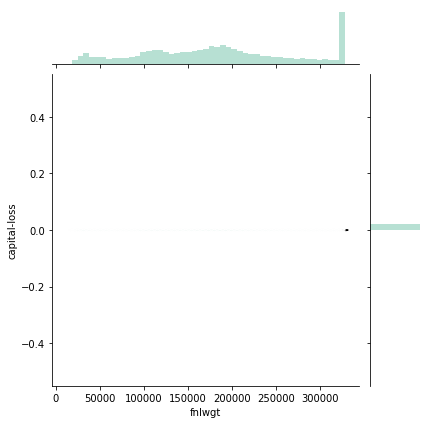

<Figure size 720x576 with 0 Axes>

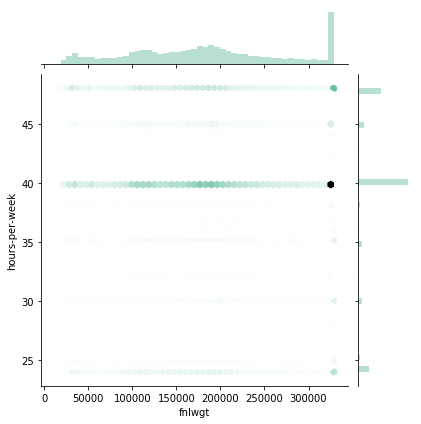

In [21]:
for i in df.select_dtypes(exclude='object'):
    plt.figure(figsize=(10,8))
    sns.jointplot(data=df, x="fnlwgt", y=df[i], kind="hex",color="#4CB391")
    plt.show()

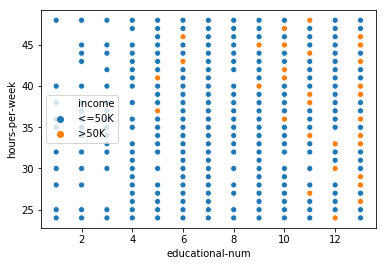

In [22]:
sns.scatterplot(x='educational-num',y='hours-per-week',hue='income',data=df)
plt.show()

- After Normalizing the hours per week most of the members salary below 50,000.

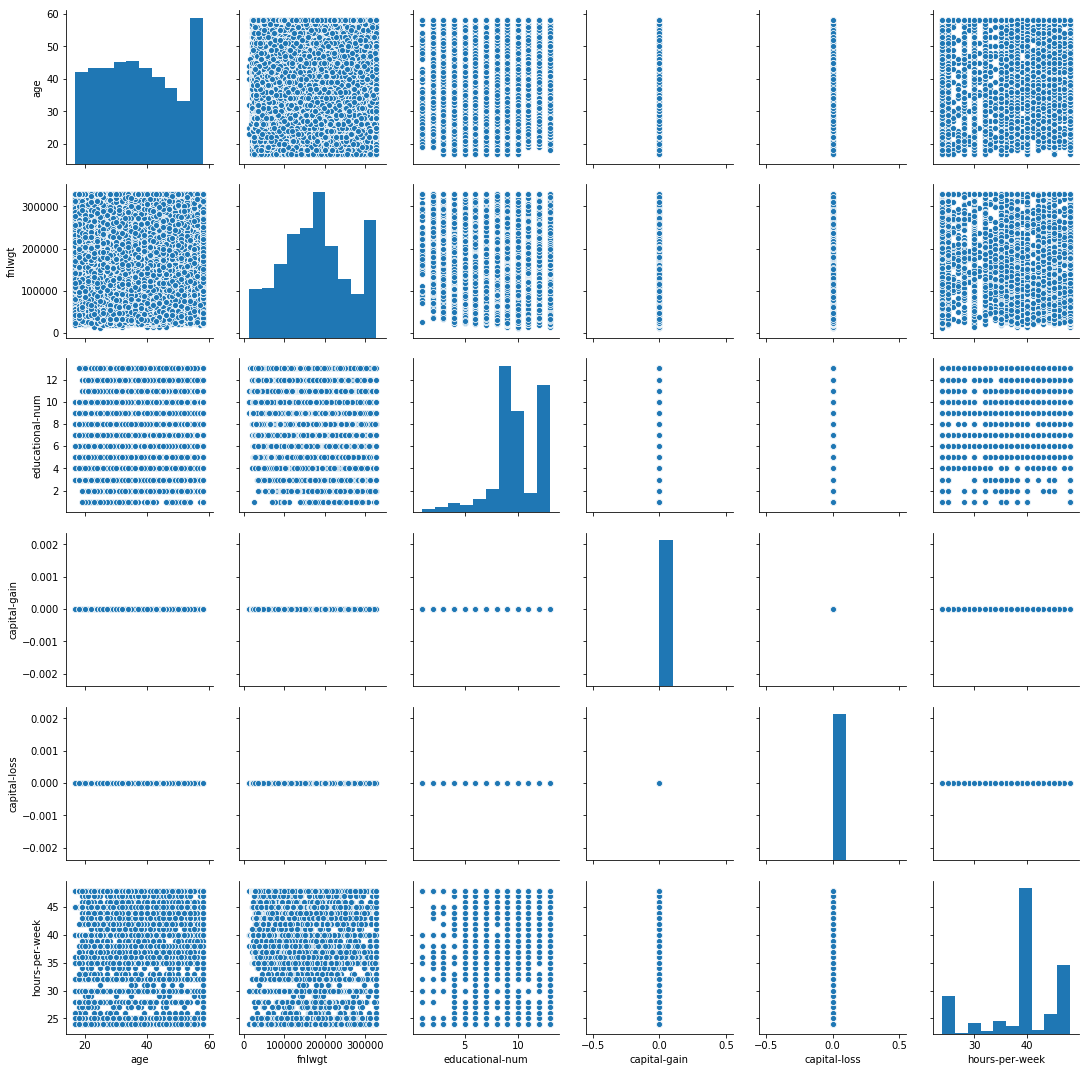

In [23]:
sns.pairplot(df.select_dtypes(exclude='O'))
plt.show()

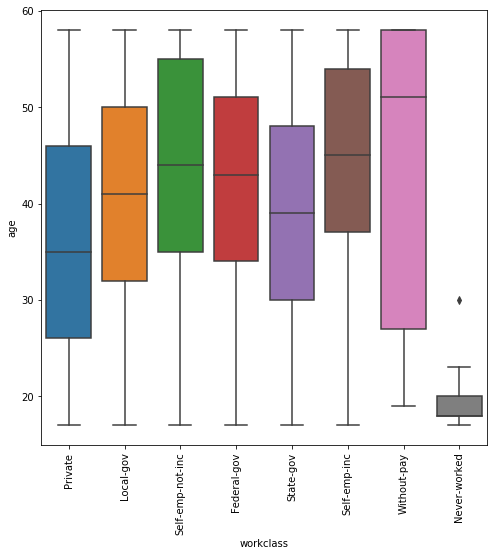

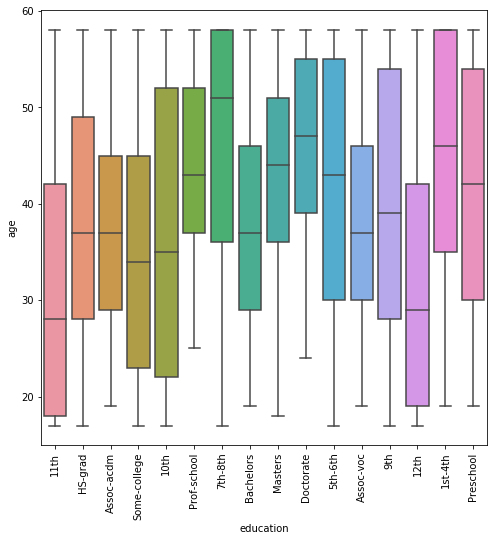

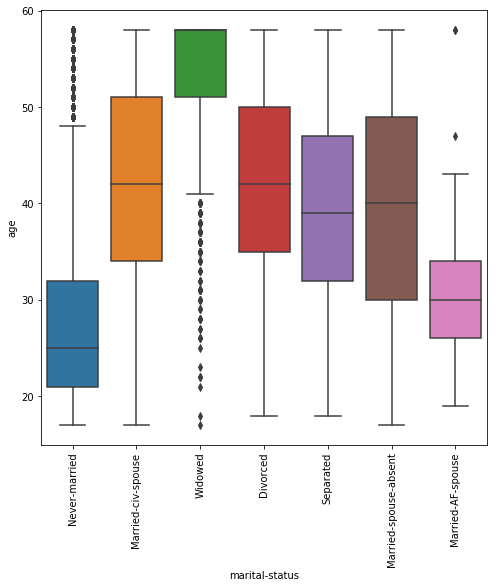

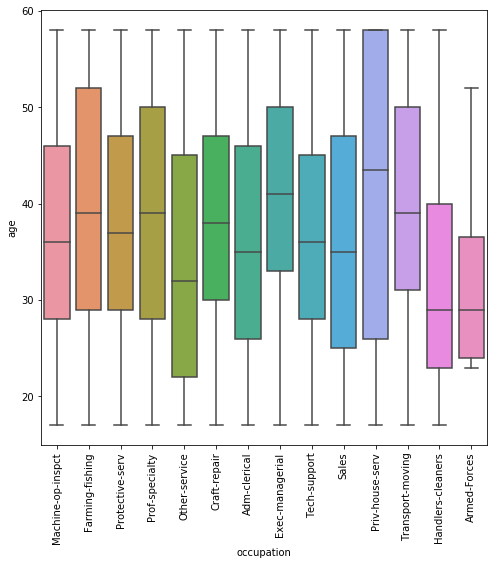

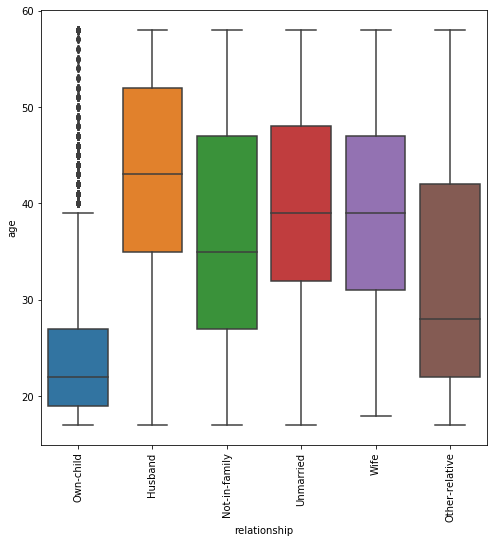

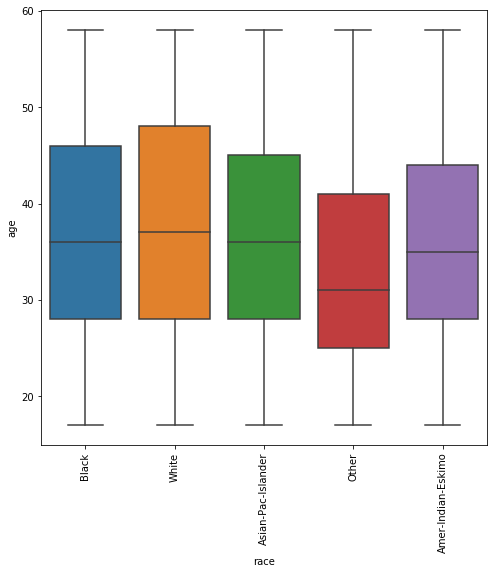

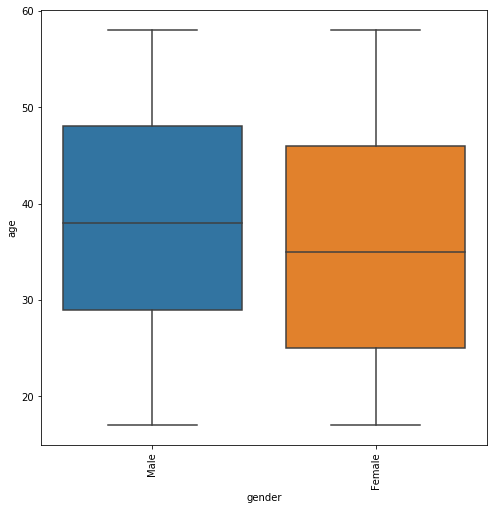

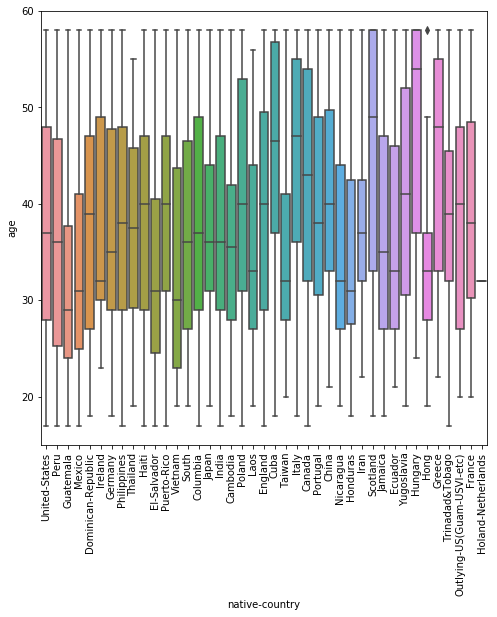

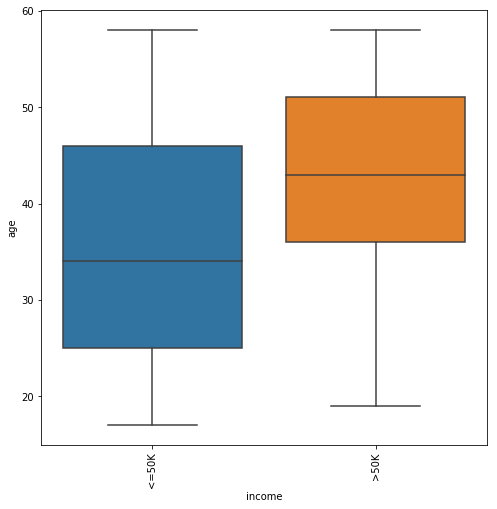

In [24]:
for i in df.select_dtypes(include='object'):
    plt.figure(figsize=(8,8))
    sns.boxplot(x=df[i], y='age',data=df)
    plt.xticks(rotation=90)
    plt.show()

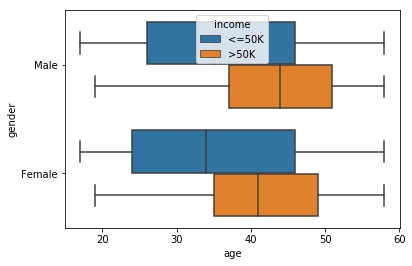

In [25]:
sns.boxplot(x='age',y='gender',hue='income',data=df)
plt.show()

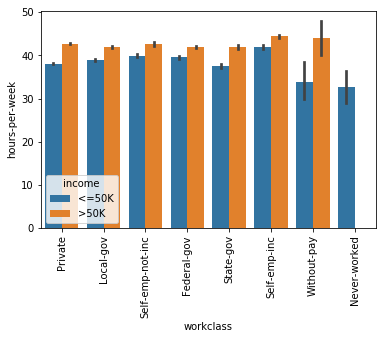

In [26]:
sns.barplot(x='workclass',y='hours-per-week',hue='income',data=df)
plt.xticks(rotation=90)
plt.show()

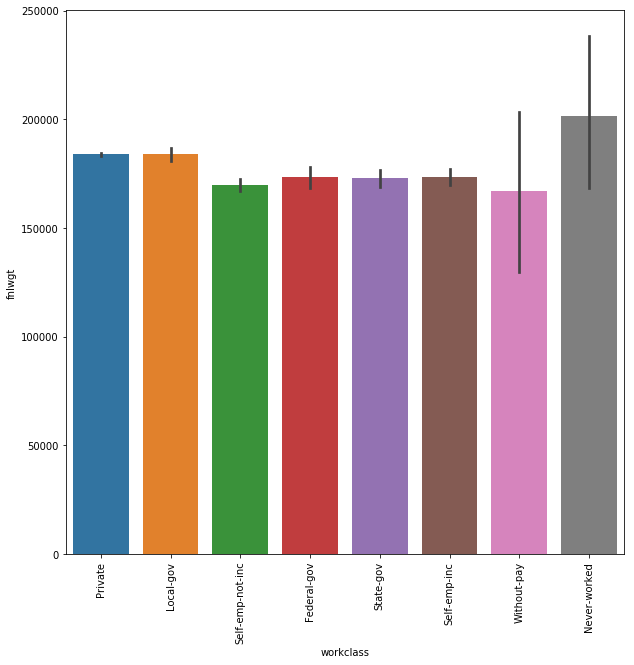

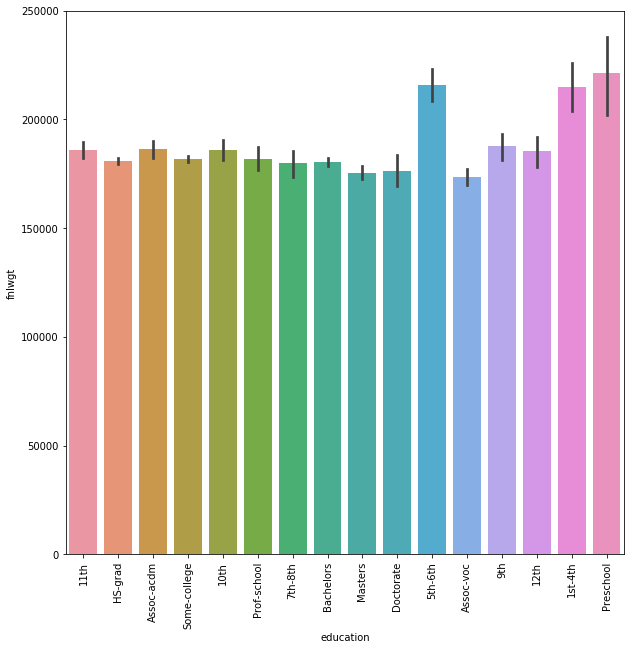

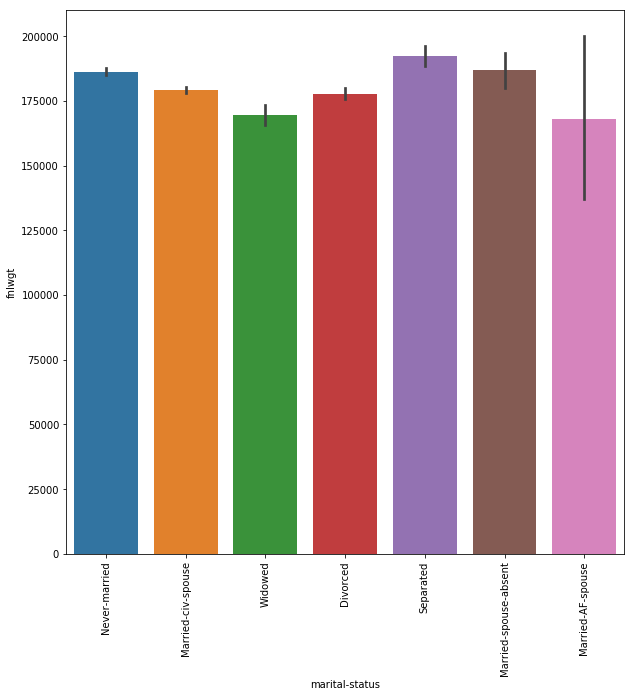

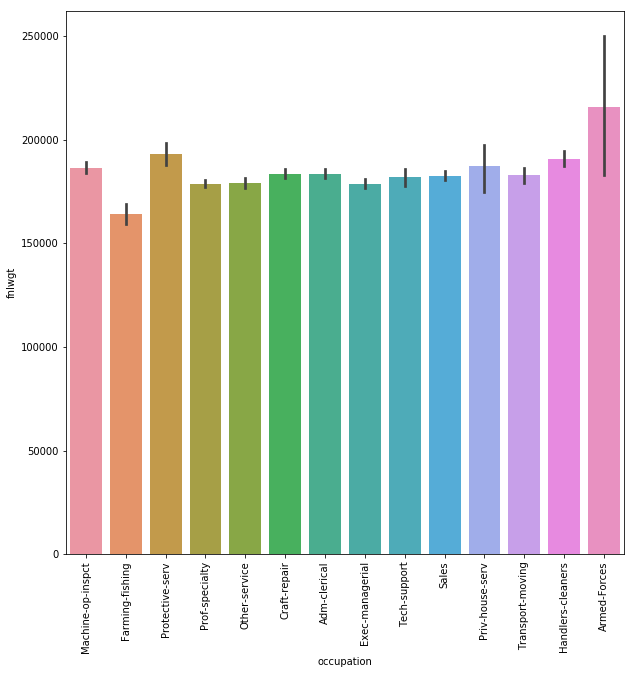

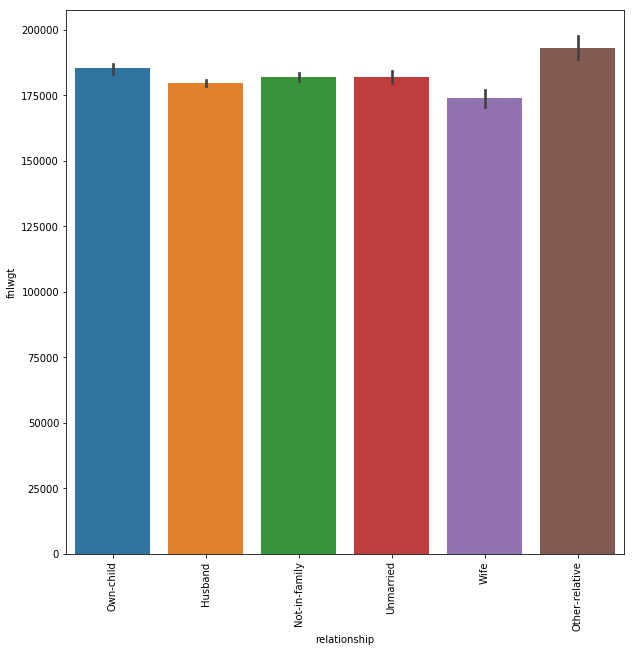

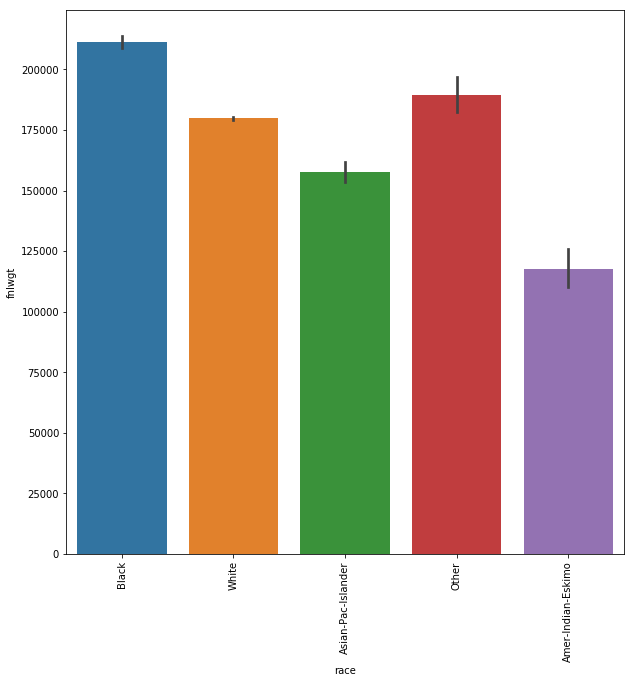

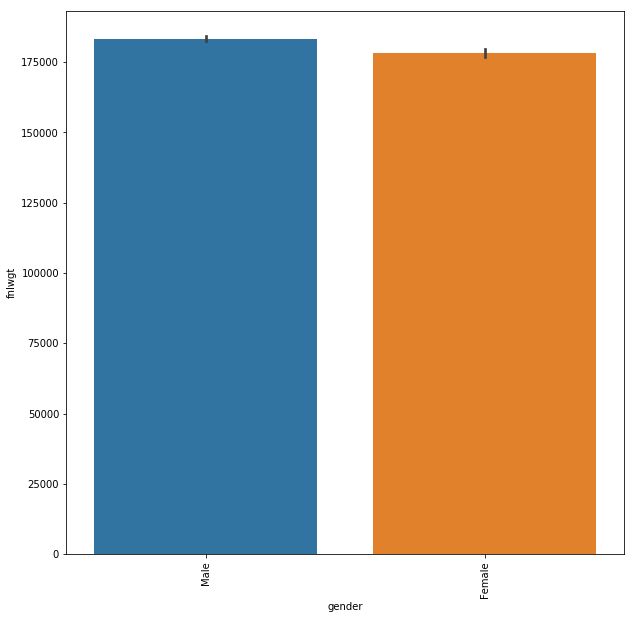

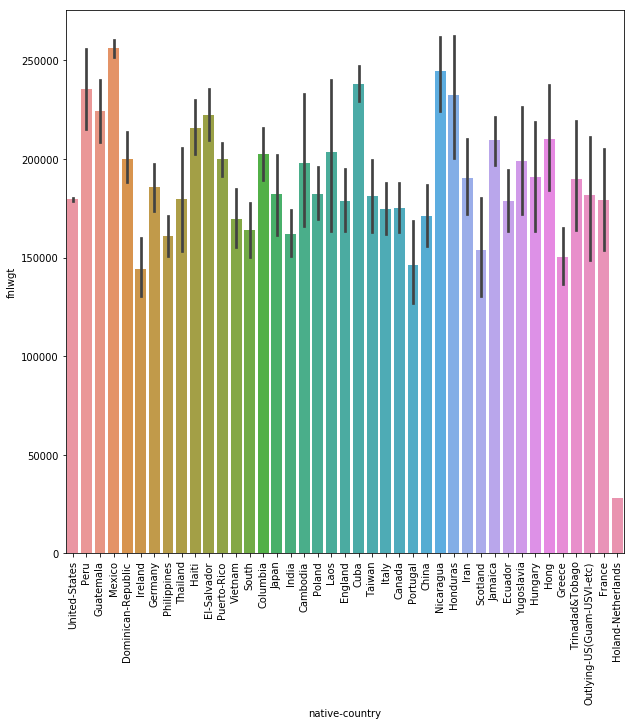

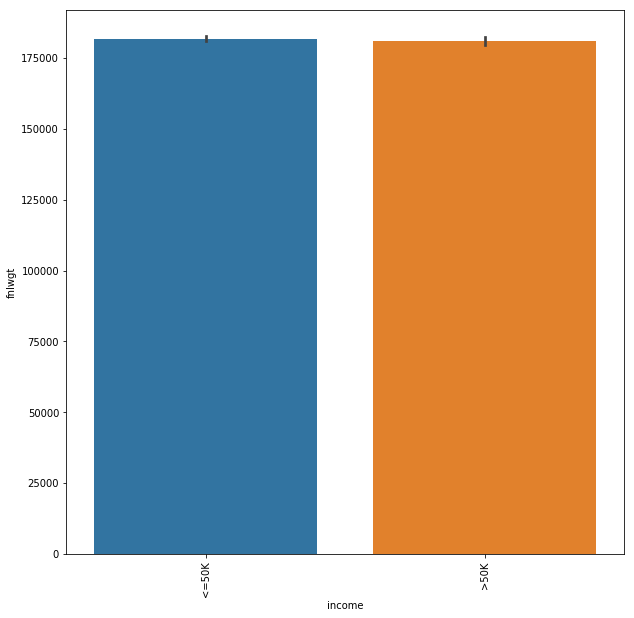

In [27]:
for i in df.select_dtypes(include='object'):
    plt.figure(figsize=(10,10))
    sns.barplot(x=df[i], y='fnlwgt',data=df)
    plt.xticks(rotation=90)
    plt.show()

### Numerical Features Column For Standardization

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
X=df[['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']]
Y=df['age']

print(X.head())

   fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0  226802                7             0             0              40
1   89814                9             0             0              48
2  328466               12             0             0              40
3  160323               10             0             0              40
4  103497               10             0             0              30


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [31]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [32]:
num_cols=['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [33]:
X_train_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
41835,1.271049,1.285439,0.0,0.0,1.195631
4223,-1.310417,-0.399989,0.0,0.0,0.079785
38554,0.187686,1.285439,0.0,0.0,0.079785
14708,-0.568898,1.285439,0.0,0.0,0.358746
29485,-0.772241,1.285439,0.0,0.0,0.358746
17554,1.669972,-0.399989,0.0,0.0,0.079785
4106,0.270188,-0.399989,0.0,0.0,-2.012426
5627,1.698859,-0.399989,0.0,0.0,0.079785
4373,-0.172100,-0.399989,0.0,0.0,0.079785
8309,-0.192074,-0.399989,0.0,0.0,-0.199176


In [34]:
X_test_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
18666,0.357868,1.285439,0.0,0.0,1.195631
5144,-0.504750,-1.242702,0.0,0.0,0.079785
47447,-0.939722,-0.399989,0.0,0.0,0.079785
40194,-0.081660,0.864082,0.0,0.0,0.079785
23224,-0.925866,1.285439,0.0,0.0,0.079785
39527,-0.506922,-0.399989,0.0,0.0,-2.151906
24463,0.116586,-0.399989,0.0,0.0,1.195631
16353,-0.223449,1.285439,0.0,0.0,1.195631
17111,0.897735,-1.242702,0.0,0.0,-2.151906
26486,0.027004,-0.399989,0.0,0.0,1.195631


### Using Dummy variables For Categorical Attributes

In [35]:
df["gender"] = df.gender.map({'Male':1,'Female':0})

In [36]:
df["race"] = df.race.map({'Black':1,'White':0})

In [37]:
df_cat = pd.get_dummies(df,columns=['workclass','education','marital-status','occupation','relationship','native-country','income'],drop_first=True)
df_cat.head()

,age,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,1.0,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0.0,1,0,0,48,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,328466,12,0.0,1,0,0,40,1,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,1.0,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0.0,0,0,0,30,0,0,...,0,0,0,0,0,0,1,0,0,0


### Prove Central Limit Theorem on Age

In [38]:
from scipy.stats import norm 
age=np.array(df.age)

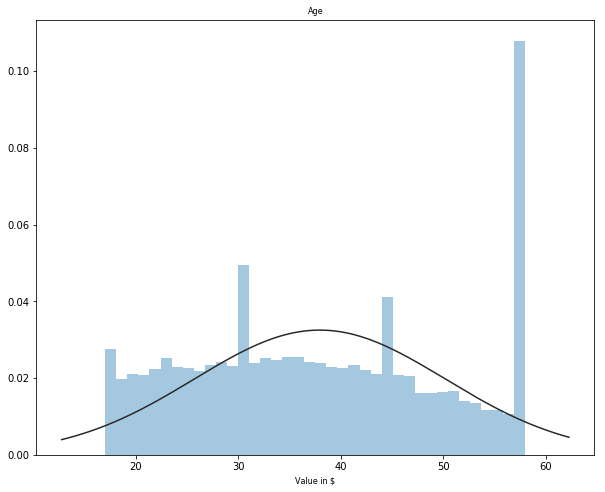

In [39]:
plt.figure(figsize=(10, 8))
plt.title('Age', size=8)
plt.xlabel('Value in $', size=8)
sns.distplot(age, fit=norm, kde=False)

In [40]:
sample_num = 1000
sample_size = 30

mean_sample_values = []

for i in range(sample_num):
    sample_mean = np.mean(np.random.choice(age, sample_size, replace=True))
    mean_sample_values.append(sample_mean) 

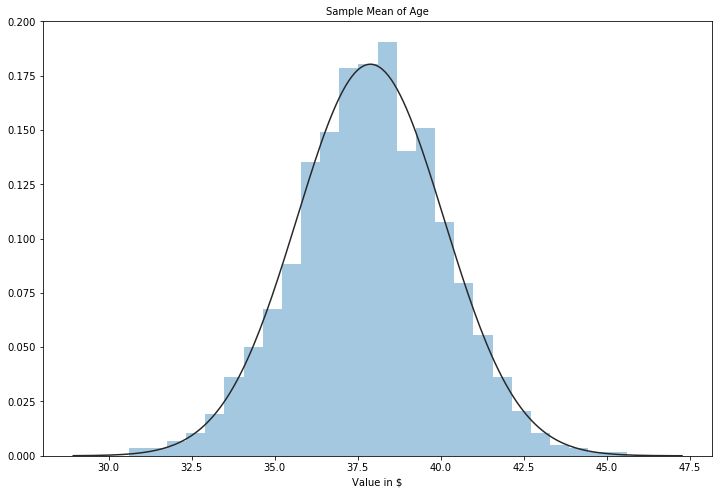

In [41]:
plt.figure(figsize=(12, 8))
plt.title('Sample Mean of Age', size=10)
plt.xlabel('Value in $', size=10)
sns.distplot(mean_sample_values, fit=norm, kde=False)
plt.show()

> - Plotting the sample means distribution, which approaches a normal distribution. As we can see, the central limit theorem is indeed true

### Chi Square Test For Relationship between Occupation and gender

In [42]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [43]:
df.gender.value_counts()

1    32614
0    16176
Name: gender, dtype: int64

In [44]:
df.occupation.value_counts()

Prof-specialty       8970
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [45]:
pd.crosstab(df.occupation, df.gender, margins=True)

gender,0,1,All
occupation,,,
Adm-clerical,3764,1842,5606
Armed-Forces,0,15,15
Craft-repair,323,5779,6102
Exec-managerial,1748,4334,6082
Farming-fishing,95,1390,1485
Handlers-cleaners,254,1817,2071
Machine-op-inspct,803,2214,3017
Other-service,2697,2222,4919
Priv-house-serv,226,14,240


In [46]:
observed = pd.crosstab(df.occupation,df.gender)
observed

gender,0,1
occupation,,
Adm-clerical,3764,1842
Armed-Forces,0,15
Craft-repair,323,5779
Exec-managerial,1748,4334
Farming-fishing,95,1390
Handlers-cleaners,254,1817
Machine-op-inspct,803,2214
Other-service,2697,2222
Priv-house-serv,226,14


In [47]:
chi2_contingency(observed)

(8699.500267454208, 0.0, 13, array([[1.85863201e+03, 3.74736799e+03],
        [4.97315024e+00, 1.00268498e+01],
        [2.02307752e+03, 4.07892248e+03],
        [2.01644665e+03, 4.06555335e+03],
        [4.92341873e+02, 9.92658127e+02],
        [6.86626276e+02, 1.38437372e+03],
        [1.00026628e+03, 2.01673372e+03],
        [1.63086173e+03, 3.28813827e+03],
        [7.95704038e+01, 1.60429596e+02],
        [2.97394384e+03, 5.99605616e+03],
        [3.25575569e+02, 6.56424431e+02],
        [1.82381996e+03, 3.67718004e+03],
        [4.79080139e+02, 9.65919861e+02],
        [7.80784587e+02, 1.57421541e+03]]))

In [48]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
adult_data= chi2_contingency(observed)[2]

In [49]:
alpha = 1 - 0.90

chi2_critical = chi2.ppf(1 - alpha, adult_data)

chi2_critical

19.81192930712756

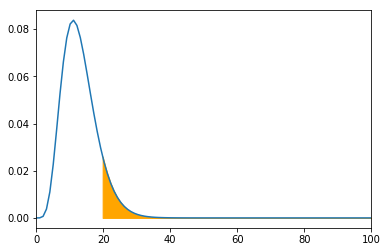

In [50]:
x_min = 0
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, adult_data)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, adult_data)
plt.fill_between(x1, y1,color='orange')

In [51]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [52]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


**Conclusion:**
> Finally we are proved that our data is Reject the null Hypothesis By using chi-squre test

________________

____________________